In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from Trigger import *

df = pd.read_csv("test.csv", index_col=0)
df.sort_values(["file"], inplace=True, ascending=False)
df

file      length  start_frame  \
9   ./data//M20190901_044600_USUtah_UT3_N1.avi   30.083218           24   
6   ./data//M20190901_044525_USUtah_UT3_N1.avi   33.241539           28   
0   ./data//M20190901_044327_USUtah_UT3_N1.avi   20.024984           17   
1   ./data//M20190901_044327_USUtah_UT3_N1.avi  237.427887           26   
4   ./data//M20190901_044218_USUtah_UT3_N1.avi  100.284592           28   
11  ./data//M20190901_044136_USUtah_UT3_N1.avi  207.935089           24   
10  ./data//M20190901_044120_USUtah_UT3_N1.avi  150.950317           28   
5   ./data//M20190901_043930_USUtah_UT3_N1.avi   61.032780           25   
12  ./data//M20190901_043910_USUtah_UT3_N1.avi  131.711807           29   
13  ./data//M20190901_043910_USUtah_UT3_N1.avi   22.803509            1   
2   ./data//M20190901_043802_USUtah_UT3_N1.avi  118.004234           28   
3   ./data//M20190901_043802_USUtah_UT3_N1.avi   30.232433           39   
7   ./data//M20190901_043706_USUtah_UT3_N1.avi   21.189621           56   
8   ./data//M20190901_043706_USUtah_UT3_N1.avi  402.057220           28   

    end_frame  rect_min_x  rect_min_y  rect_max_x  rect_max_y  section  \
9          43      1065.0       829.0      1074.0       859.0      120   
6          33       718.0       833.0       722.0       866.0      118   
0          20      1748.0       594.0      1767.0       595.0       78   
1          44      1320.0       333.0      1516.0       467.0       59   
4          42      1782.0       412.0      1801.0       526.0       62   
11         47      1061.0       400.0      1194.0       560.0       73   
10         38      1670.0         2.0      1800.0        78.0       14   
5          37       985.0       810.0      1005.0       868.0      104   
12         37       983.0        47.0      1085.0       132.0        8   
13         67      1814.0       751.0      1834.0       763.0      111   
2          39       104.0       402.0       176.0       494.0       49   
3          55      1687.0       987.0      1704.0      1012.0      142   
7          77       104.0       726.0       123.0       734.0       96   
8         110       450.0       496.0       814.0       674.0       69   

    time_block  line_fit  
9            4       NaN  
6            8       NaN  
0            7       NaN  
1            6       NaN  
4            8       NaN  
11           4       NaN  
10           8       NaN  
5            5       NaN  
12           9       NaN  
13           1       NaN  
2            8       NaN  
3            9       NaN  
7            6       NaN  
8            8       NaN

In [2]:
triggers = read_df(df)
triggers

array([Trigger(file=PosixPath('data/M20190901_044327_USUtah_UT3_N1.avi'), length=20.02498435974121, start_frame=17, end_frame=20, bounding_rect=Rect(min_x=1748.0, min_y=594.0, max_x=1767.0, max_y=595.0), section=78, time_block=7, line_fit=nan),
       Trigger(file=PosixPath('data/M20190901_044327_USUtah_UT3_N1.avi'), length=237.42788696289065, start_frame=26, end_frame=44, bounding_rect=Rect(min_x=1320.0, min_y=333.0, max_x=1516.0, max_y=467.0), section=59, time_block=6, line_fit=nan),
       Trigger(file=PosixPath('data/M20190901_043802_USUtah_UT3_N1.avi'), length=118.00423431396484, start_frame=28, end_frame=39, bounding_rect=Rect(min_x=104.0, min_y=402.0, max_x=176.0, max_y=494.0), section=49, time_block=8, line_fit=nan),
       Trigger(file=PosixPath('data/M20190901_043802_USUtah_UT3_N1.avi'), length=30.2324333190918, start_frame=39, end_frame=55, bounding_rect=Rect(min_x=1687.0, min_y=987.0, max_x=1704.0, max_y=1012.0), section=142, time_block=9, line_fit=nan),
       Trigger(file

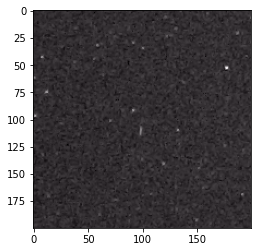

In [12]:
from IPython.core.display import display

trigger = triggers[6]
frames = [
    cut_rect_from_frame(frame, center_rect(trigger, Vec2(100,100)))
    for frame in get_frames(trigger)
]

display(animate(frames))


In [4]:
frame = frames[0]
print(frame.shape)

frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

h, w = frame.shape
parts = []
size_x = 50
size_y = 50

# parts = frame.reshape(50,50,16)

new_w = ((w // size_x) + 1) * size_x
new_h = ((h // size_y) + 1) * size_y
for x in range((w // size_x)):
    for y in range((h // size_y)):

        parts.append(
            cut_rect_from_frame(
                frame,
                Rect(x * size_x, y * size_y, -1+(x + 1) * size_x,
                     -1+(y + 1) * size_y)))


(200, 200, 3)


(50, 50)
IMAGE: 0


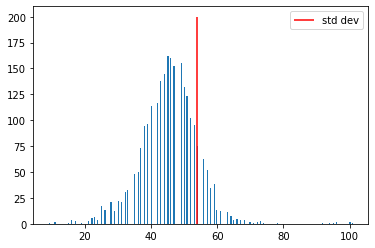

45 8.769420505369782


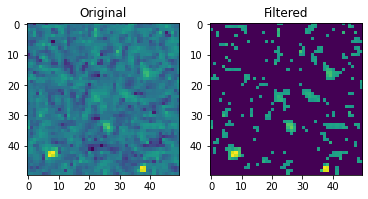

IMAGE: 1


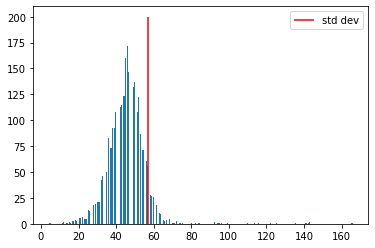

46 10.992396644954184


IMAGE: 2


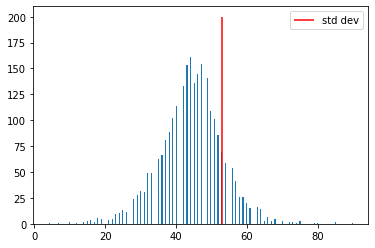

44 9.070450405575238


IMAGE: 3


46 9.936490036225065


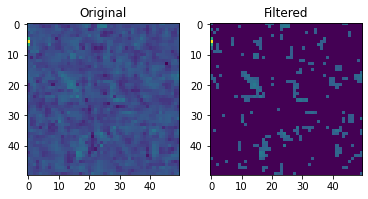

IMAGE: 4


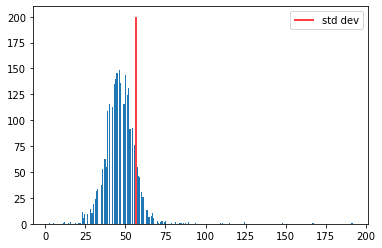

46 10.756847448950833


IMAGE: 5


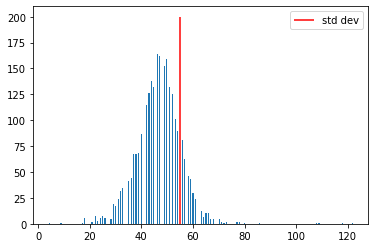

46 8.83059775100191


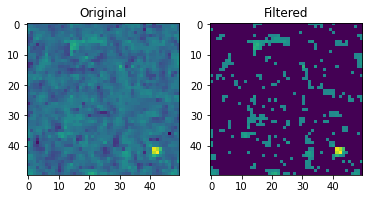

IMAGE: 6


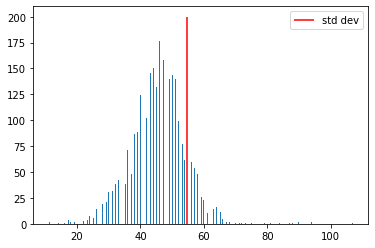

46 8.734582476569788


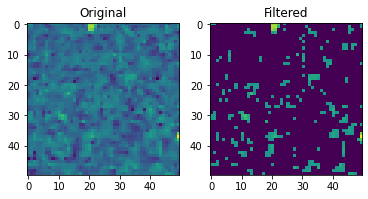

IMAGE: 7


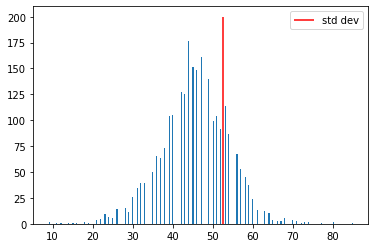

44 8.5614155371644


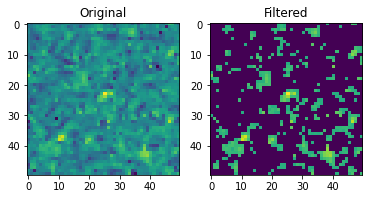

IMAGE: 8


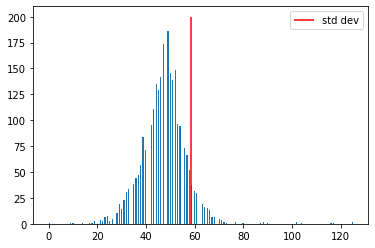

49 9.354168816094779


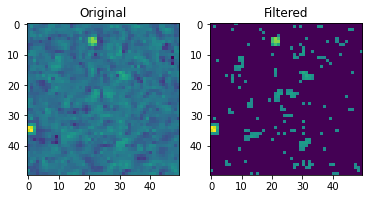

IMAGE: 9


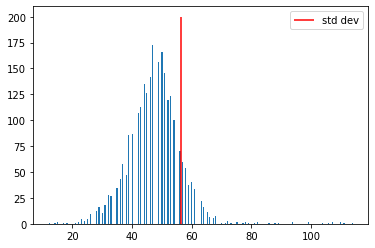

47 9.300746774318716


IMAGE: 10


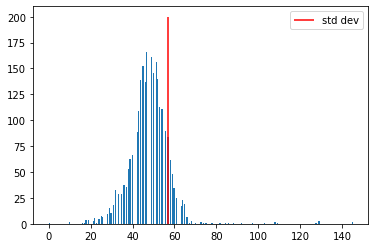

47 9.973205534831818


IMAGE: 11


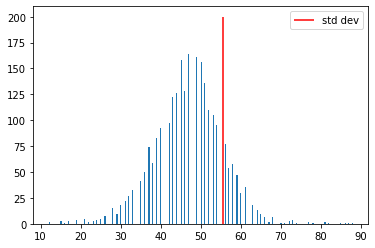

47 8.678549703723544


IMAGE: 12


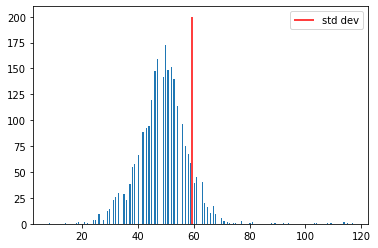

50 9.289907642167385


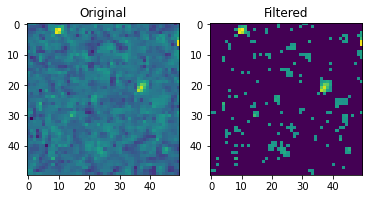

IMAGE: 13


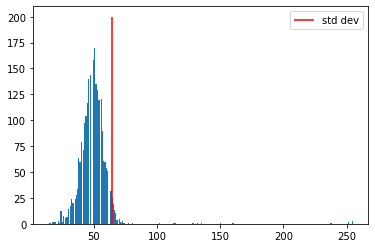

50 13.959756851750678


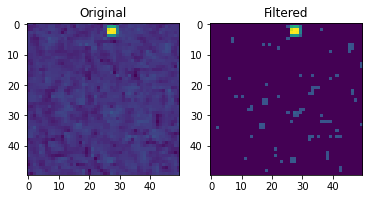

IMAGE: 14


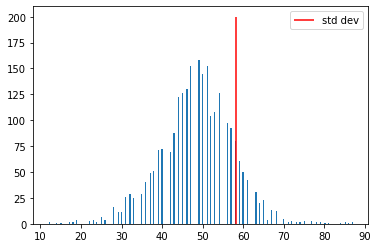

49 9.127986494293252


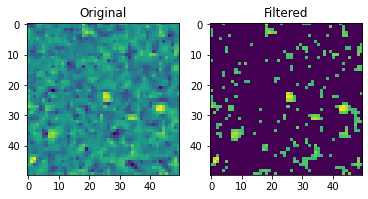

IMAGE: 15


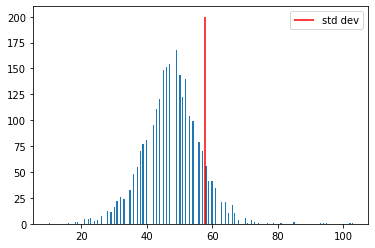

49 8.878521129107032


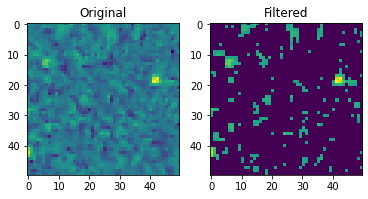

In [5]:
print(f"{parts[0].shape}")
results = []
for idx, part in enumerate(parts):
    print(f"IMAGE: {idx}")
    colors = part.flatten()
    dev = np.std(colors)
    counts = np.bincount(colors)
    most_freq = np.argmax(counts)
    plt.hist(colors,bins=256)
    plt.vlines(most_freq + dev,0,200, color='r', label="std dev")
    plt.legend()
    plt.show()
    def filter(color):
        return color if color > most_freq + dev else 0
    filtered = np.fromiter((filter(c) for c in colors), dtype=int).reshape(part.shape)
    print(most_freq,dev)
    plt.subplot(1, 2, 1)
    plt.imshow(part)
    plt.title("Original")
    plt.subplot(1, 2, 2)
    plt.imshow(filtered)
    plt.title("Filtered")
    plt.show()
    results.append(filtered)


In [6]:
results = np.array(results).reshape((200,200))
# results = results.reshape((200,200))

# results = results.reshape(new_h, new_w )

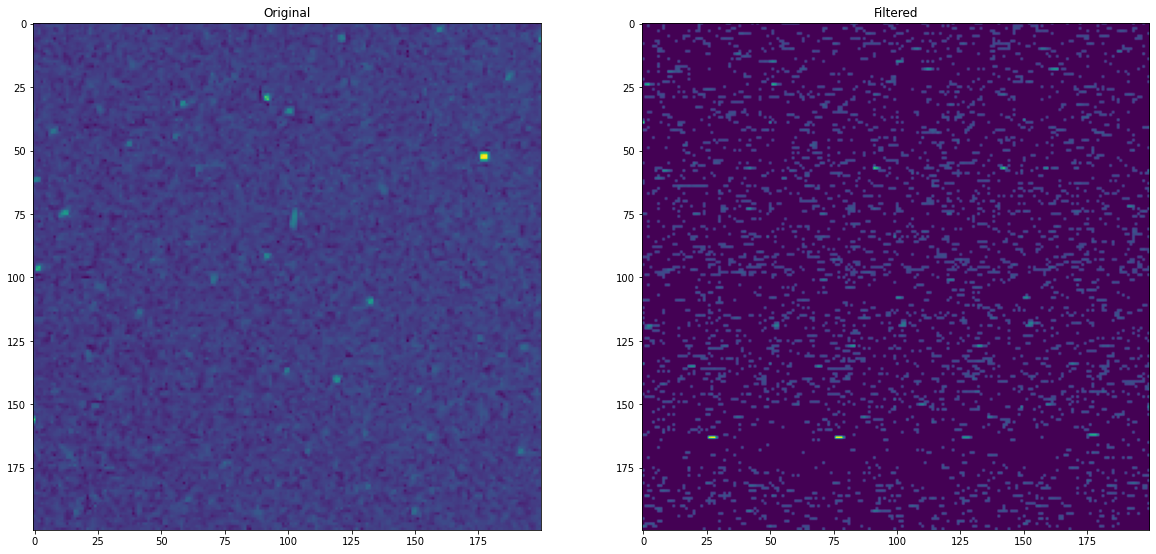

In [7]:
plt.figure(figsize=(20,20))
plt.subplot(1, 2, 1)
plt.imshow(frame)
plt.title("Original")
plt.subplot(1, 2, 2)
plt.imshow(results)
plt.title("Filtered")
plt.show()


In [8]:
def remove_back(frame):

    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    h, w = frame.shape
    parts = []
    size_x = 50
    size_y = 50

    for x in range((w // size_x)):
        for y in range((h // size_y)):
            parts.append(
                cut_rect_from_frame(
                    frame,
                    Rect(x * size_x, y * size_y, -1 + (x + 1) * size_x,
                         -1 + (y + 1) * size_y)))

    results = []
    for idx, part in enumerate(parts):
        colors = part.flatten()
        dev = np.std(colors)
        counts = np.bincount(colors)
        most_freq = np.argmax(counts)

        def filter(color):
            return color if color > most_freq + dev * 3 else 0

        filtered = np.fromiter((filter(c) for c in colors),
                               dtype=int).reshape(part.shape)

        results.append(filtered)

    results = np.array(results)

    # return np.array(results).reshape((200,200))
    result = np.zeros_like(frame)

    for res, x in zip(results.flatten(),
                      np.nditer(result, op_flags=['readwrite'])):
        x = res

    return result


In [9]:
def remove_v2(frame):
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    h_original, w_original = frame.shape
    parts = []
    size_x = 50
    size_y = 50

    parts = frame.reshape((-1, h_original // 100, 50))

    n, h, w = parts.shape

    for idx, part in enumerate(parts):
        colors = part.flatten()
        dev = np.std(colors)
        counts = np.bincount(colors)
        most_freq = np.argmax(counts)

        def filter(color):
            return color if color > most_freq + dev * 3 else 0

        parts[idx] = np.fromiter((filter(c) for c in colors),
                            dtype=int).reshape(part.shape)
    
    return parts.reshape((h_original, w_original))



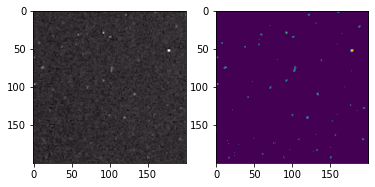

In [10]:
frame = frames[0]
# frame = cv2.medianBlur(frame, 3)
bg_removed = remove_v2(frame)


plt.subplot(1,2,1)
plt.imshow(frame)

plt.subplot(1, 2, 2)
plt.imshow(bg_removed)

plt.show()

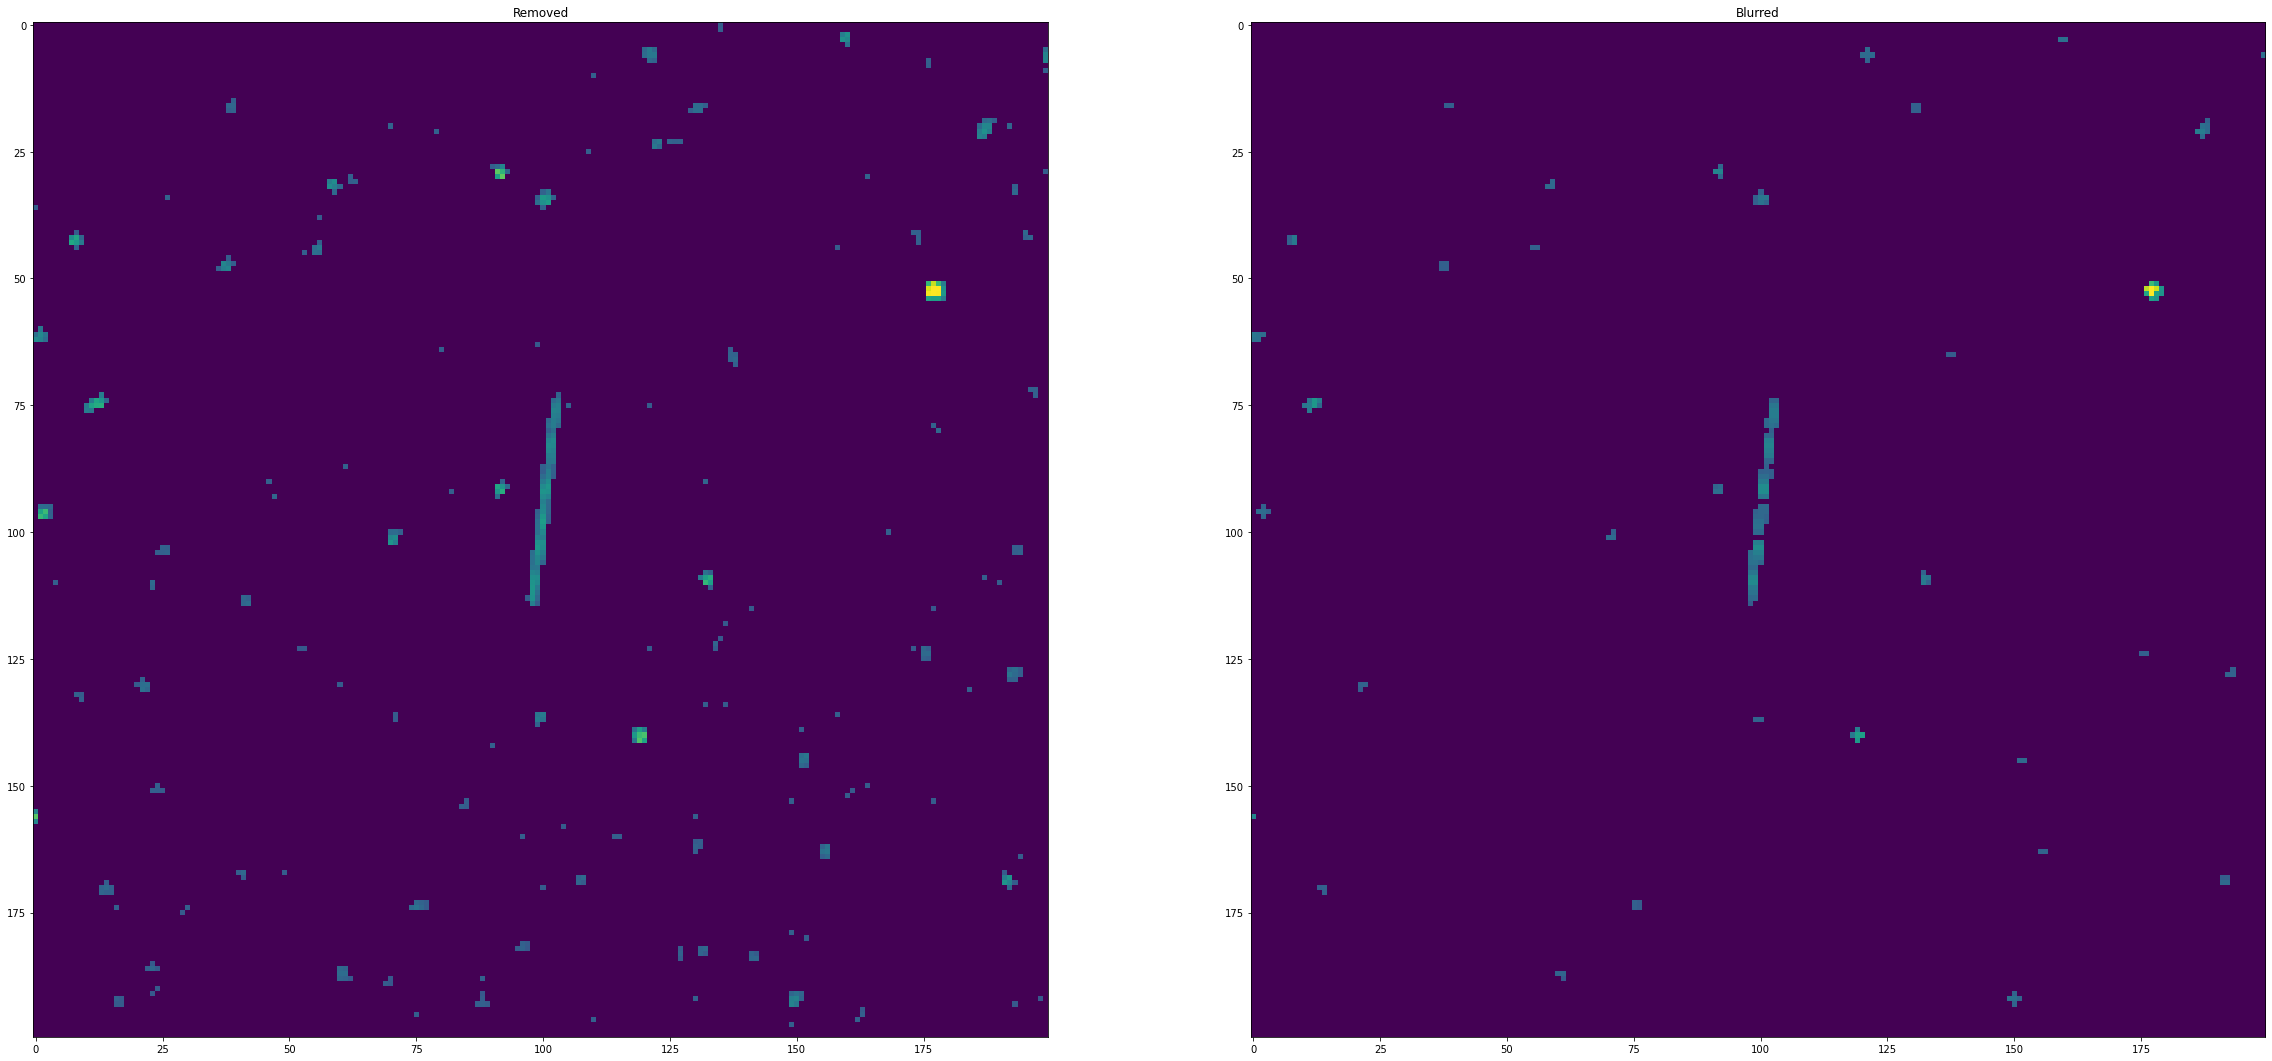

In [25]:
bg_removed = [remove_v2(frame) for frame in frames]


plt.figure(figsize=(40,40))

plt.subplot(1, 2, 1)
plt.title("Removed")
plt.imshow(combine_frames(bg_removed))

plt.subplot(1, 2, 2)
plt.title("Blurred")
blurred = [cv2.medianBlur(frame, 3) for frame in bg_removed]
# grayscale = [cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY) for frame in frames]
plt.imshow(combine_frames(blurred))


plt.show()

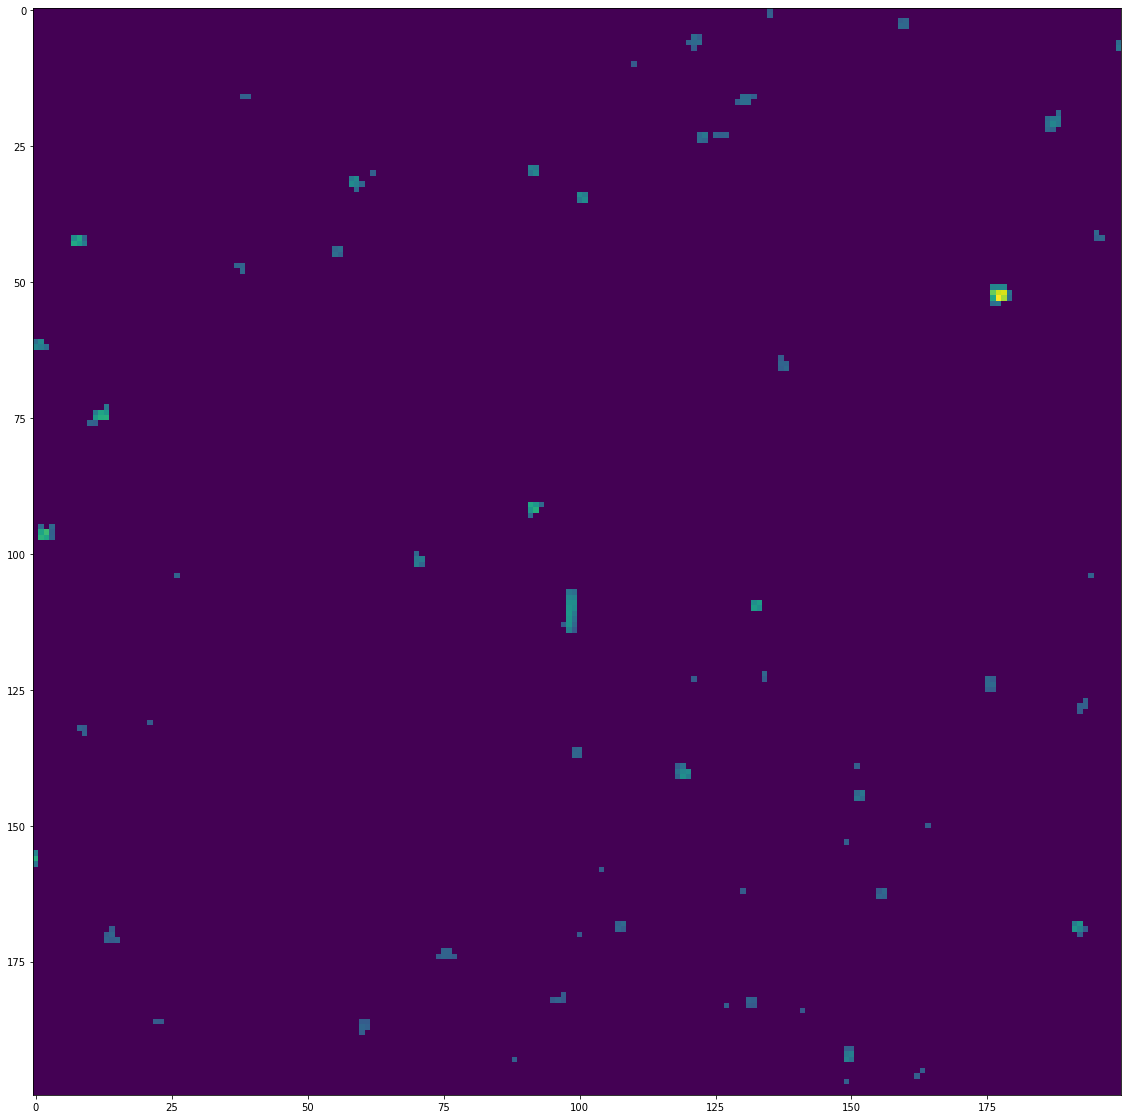

In [16]:
animate(bg_removed, size=(20,20))